In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities.iterables import multiset_permutations
from scipy.optimize import curve_fit
from scipy.stats import norm

In [128]:
def get_x(array: np.array):
    p = len(array)/5
    columns = np.array(np.split(array, p))
    possible_x_values = np.apply_along_axis(np.median, arr=columns, axis=1)
    return np.median(possible_x_values)

In [129]:
# Define domain size. In this case, m is the number of blocks of 5 elements
m = 1
n = 5*m
# Note: m=1 takes about 1 second, m=2 takes about 2.5 minutes, m=3 takes years.
# Create a sorted array containing elements 1:n+1.
# Note: this is equivalent to any array of distinct real numbers because there will be some ordering.
sorted_array = np.arange(1, n + 1)
# Create an ndarray, with each column being a different permutation of the sorted array. There should be 5n! elements
permutations = np.array(list(multiset_permutations(sorted_array)))
assert len(permutations) == np.math.factorial(n)

In [130]:
# For each permutation of the sorted array, find x
x_values = np.apply_along_axis(get_x, arr=permutations, axis=1)

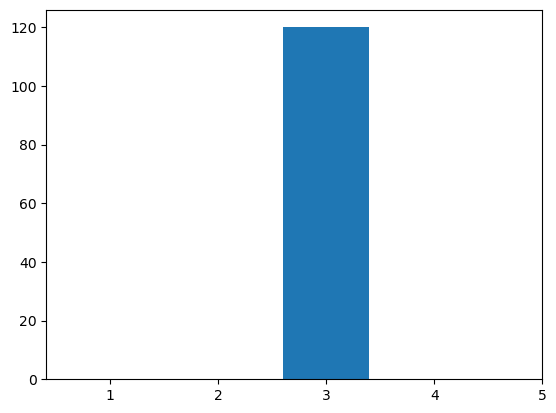

In [131]:
hist, _ = np.histogram(x_values, sorted_array)
plt.bar(sorted_array[:-1], hist, align='center')
plt.gca().set_xticks(sorted_array)
plt.show()

In [132]:
# New approach. Instead of deterministically finding each permutation,
# randomly permute the sorted array, then append x to output.
ms = [1, 5, 20, 100]
all_x_values = []
sorted_arrays = []
for m in ms:
    n = 5*m # 500 elements
    sorted_array = np.arange(1, n+1)
    sorted_arrays.append(sorted_array)
    epochs = 100
    iterations = 10000
    x_values = np.zeros(iterations*epochs)
    for epoch in range(epochs):
        permutations = np.ones([iterations,n])*sorted_array
        permutations = np.apply_along_axis(np.random.permutation, arr=permutations, axis=1)
        x_values[epoch*iterations:(epoch+1)*iterations] = np.apply_along_axis(get_x, arr=permutations, axis=1)
    all_x_values.append(x_values)

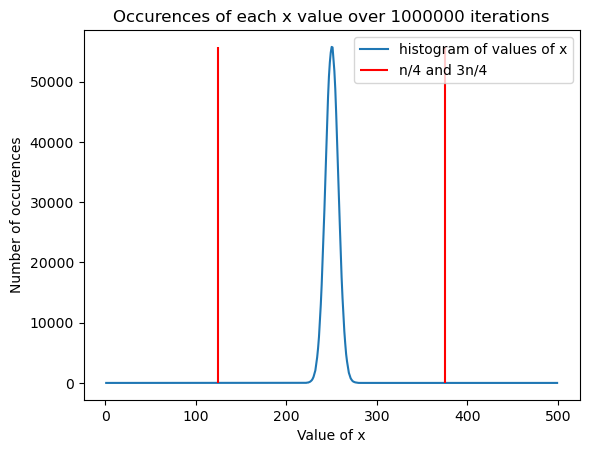

In [140]:
sorted_array = sorted_arrays[3]
x_values = all_x_values[3]
n = 5*ms[3]
hist, _ = np.histogram(x_values, sorted_array)
plt.figure()
plt.title(f'Occurences of each x value over {epochs*iterations} iterations')
plt.ylabel('Number of occurences')
plt.xlabel('Value of x')
plt.plot(sorted_array[:-1], hist, label='histogram of values of x')
plt.vlines([n/4, 3*n/4], 0, max(hist), colors=['r', 'r'], label='n/4 and 3n/4')
plt.legend()